# how does the training behave as the training size increases

In [12]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':16})

import numpy as np

In [13]:
import tensorflow as tf


In [14]:
from tf_fourier_features import FourierFeatureProjection

# gaussian

- https://arxiv.org/abs/2204.05735: Gaussian activations without RFF?
- https://github.com/laura-a-n-n/tf-garf

In [15]:
def gaussian_activation(x, c=0, sigma=0.1):
    return tf.math.exp(-(x-c)**2 / (2*sigma**2))    

In [5]:
def gen_data(n=500):
    # x = np.linspace(-0.5, 0.5, 500)
    # x = np.linspace(0, 0.5, 500)
    x = np.linspace(0, 0.5, n)
    # x = np.linspace(0, 0.5, 10000)
    y = np.sin(2*np.pi*x/1.2) + np.sin(2*np.pi*x*50)/10 * x**2*100 + np.sin(2*np.pi*x*20)/10

    x = x[:,np.newaxis]-0.25
    y = y[:,np.newaxis]

    xtrain = x[::2]
    xval = x[1::2]

    ytrain = y[::2]
    yval = y[1::2]

    return xtrain, ytrain, xval, yval

In [10]:
x_, y_, _, _ = gen_data(n=500)

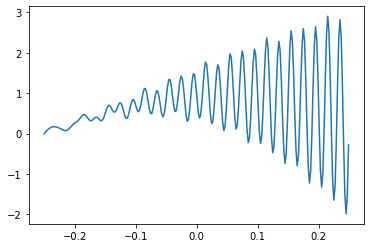

In [11]:
plt.plot(x_, y_)

# vary sample size

In [133]:
%%time
model_list=[]
history_list=[]

# sample_sizes = np.arange(100, 1000, 100)
# sample_sizes = np.linspace(100, 1000, 10)
# sample_sizes = np.linspace(1000, 10000, 10)
# sample_sizes = np.linspace(100, 10000, 4)
sample_sizes = np.array([100, 200, 1000])

# by specifying the number of batches
# and computing the batch size based
# on this and the number of samples
# we train each network for the same number
# of iterations
n_batches = 5

batch_size = 20

for i, sample_size in enumerate(sample_sizes):
    print(f"working: {i+1}/{len(sample_sizes)}")
    
    batch_size = int(sample_size)//n_batches
    print(batch_size)
    
    
    xtrain, ytrain, xval, yval = gen_data(n=int(sample_size))
    
    
    # kernel_initializer = tf.keras.initializers.RandomNormal(mean=0, stddev=0.1)

    # default
    kernel_initializer = 'glorot_uniform'

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1,)),
        FourierFeatureProjection(gaussian_projection = 20, gaussian_scale = 6),
        # tf.keras.layers.Dense(256),
        tf.keras.layers.Dense(256, activation=gaussian_activation, kernel_initializer=kernel_initializer),
        tf.keras.layers.Dense(256, activation=gaussian_activation, kernel_initializer=kernel_initializer),
        # tf.keras.layers.Dense(256, activation=gaussian_activation, kernel_initializer=kernel_initializer),
        # tf.keras.layers.Dense(256, activation=gaussian_activation, kernel_initializer=kernel_initializer),
        # tf.keras.layers.Dense(256, activation=gaussian_activation, kernel_initializer=kernel_initializer),
        # tf.keras.layers.Dense(256, activation=gaussian_activation, kernel_initializer=kernel_initializer),
        # tf.keras.layers.Dense(256, activation=gaussian_activation, kernel_initializer=kernel_initializer),
        # tf.keras.layers.Dense(256, activation=gaussian_activation, kernel_initializer=kernel_initializer),
        # tf.keras.layers.Dense(256, activation=gaussian_activation, kernel_initializer=kernel_initializer),
        tf.keras.layers.Dense(1),
    ])
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))
    history = model.fit(xtrain, ytrain, epochs=100, verbose=0, batch_size=batch_size, validation_data=(xval, yval))
    
    model_list.append(model)
    history_list.append(history)
    
print("done")

working: 1/3
20


2022-06-20 13:45:43.436146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:45:43.900078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 2/3
40


2022-06-20 13:45:48.121573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:45:48.536275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 3/3
200


2022-06-20 13:45:52.846405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:45:53.269146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


done
CPU times: user 10.8 s, sys: 4.57 s, total: 15.4 s
Wall time: 14.3 s


In [117]:
# optimal size of the network: e.g number of layers
# depends on the size of your training set

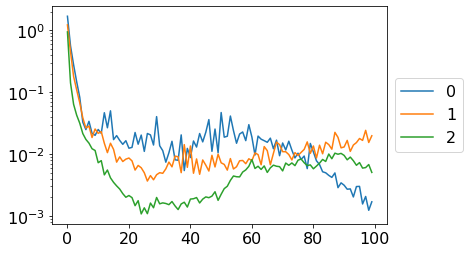

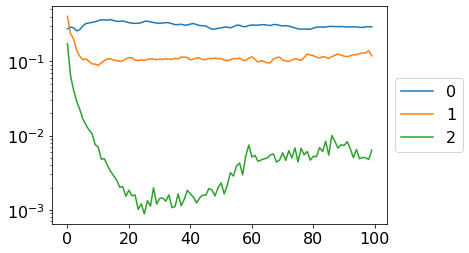

In [134]:
plt.figure()
for i in range(len(sample_sizes)):
    plt.plot(history_list[i].history['loss'], label=f'{i}')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure()
for i in range(len(sample_sizes)):
    plt.plot(history_list[i].history['val_loss'], label=f'{i}')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# fixed sample size and vary scale

In [173]:
%%time
model_list=[]
history_list=[]

# sample_size = 100
# sample_size = 200
# sample_size = 1000
sample_size = 10000
gaussian_projection = 20
gaussian_scales = np.linspace(1, 100, 100)

# by specifying the number of batches
# and computing the batch size based
# on this and the number of samples
# we train each network for the same number
# of iterations
n_batches = 5
# n_batches = 20
# n_batches = 1

# batch_size = 20

for i, gaussian_scale in enumerate(gaussian_scales):
    print(f"working: {i+1}/{len(gaussian_scales)}")
    
    batch_size = int(sample_size)//n_batches
    print(batch_size)
    
    
    xtrain, ytrain, xval, yval = gen_data(n=int(sample_size))
    
    
    # kernel_initializer = tf.keras.initializers.RandomNormal(mean=0, stddev=0.1)

    # default
    kernel_initializer = 'glorot_uniform'

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1,)),
        FourierFeatureProjection(gaussian_projection=gaussian_projection, gaussian_scale=gaussian_scale),
        # tf.keras.layers.Dense(256),
        tf.keras.layers.Dense(256, activation=gaussian_activation, kernel_initializer=kernel_initializer),
        tf.keras.layers.Dense(256, activation=gaussian_activation, kernel_initializer=kernel_initializer),
        # tf.keras.layers.Dense(256, activation='relu'),
        # tf.keras.layers.Dense(256, activation='relu'),
        # tf.keras.layers.Dense(256, activation=gaussian_activation, kernel_initializer=kernel_initializer),
        # tf.keras.layers.Dense(256, activation=gaussian_activation, kernel_initializer=kernel_initializer),
        # tf.keras.layers.Dense(256, activation=gaussian_activation, kernel_initializer=kernel_initializer),
        # tf.keras.layers.Dense(256, activation=gaussian_activation, kernel_initializer=kernel_initializer),
        # tf.keras.layers.Dense(256, activation=gaussian_activation, kernel_initializer=kernel_initializer),
        # tf.keras.layers.Dense(256, activation=gaussian_activation, kernel_initializer=kernel_initializer),
        # tf.keras.layers.Dense(256, activation=gaussian_activation, kernel_initializer=kernel_initializer),
        tf.keras.layers.Dense(1),
    ])
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))
    history = model.fit(xtrain, ytrain, epochs=100, verbose=0, batch_size=batch_size, validation_data=(xval, yval))
    
    model_list.append(model)
    history_list.append(history)
    
print("done")

working: 1/100
2000


2022-06-20 13:57:49.736439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:57:50.200401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 2/100
2000


2022-06-20 13:57:55.472014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:57:55.915258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 3/100
2000


2022-06-20 13:58:00.496735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:58:00.931039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 4/100
2000


2022-06-20 13:58:05.521670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:58:05.963899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 5/100
2000


2022-06-20 13:58:10.557611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:58:10.986194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 6/100
2000


2022-06-20 13:58:15.575233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:58:16.010792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 7/100
2000


2022-06-20 13:58:20.558158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:58:20.994417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 8/100
2000


2022-06-20 13:58:25.547193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:58:25.973438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 9/100
2000


2022-06-20 13:58:30.665196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:58:31.106317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 10/100
2000


2022-06-20 13:58:35.758649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:58:36.178369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 11/100
2000


2022-06-20 13:58:40.648652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:58:41.054542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 12/100
2000


2022-06-20 13:58:45.559727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:58:45.973213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 13/100
2000


2022-06-20 13:58:50.591683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:58:51.011249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 14/100
2000


2022-06-20 13:58:55.607805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:58:56.045946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 15/100
2000


2022-06-20 13:59:00.580103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:59:01.018765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 16/100
2000


2022-06-20 13:59:05.544991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:59:05.973200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 17/100
2000


2022-06-20 13:59:10.887928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:59:11.329575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 18/100
2000


2022-06-20 13:59:15.895682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:59:16.331722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 19/100
2000


2022-06-20 13:59:20.987841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:59:21.509592: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 20/100
2000


2022-06-20 13:59:26.175995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:59:26.627408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 21/100
2000


2022-06-20 13:59:31.212190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:59:31.662333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 22/100
2000


2022-06-20 13:59:36.303992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:59:36.873921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 23/100
2000


2022-06-20 13:59:41.577942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:59:42.161093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 24/100
2000


2022-06-20 13:59:46.904098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:59:47.363228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 25/100
2000


2022-06-20 13:59:52.091851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:59:52.640591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 26/100
2000


2022-06-20 13:59:57.227575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 13:59:57.757283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 27/100
2000


2022-06-20 14:00:02.384295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:00:02.977302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 28/100
2000


2022-06-20 14:00:07.624032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:00:08.218825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 29/100
2000


2022-06-20 14:00:12.826554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:00:13.438632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 30/100
2000


2022-06-20 14:00:18.112892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:00:18.715586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 31/100
2000


2022-06-20 14:00:23.318846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:00:23.861096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 32/100
2000


2022-06-20 14:00:28.496587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:00:28.984800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 33/100
2000


2022-06-20 14:00:33.666634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:00:34.253218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 34/100
2000


2022-06-20 14:00:39.208477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:00:39.685911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 35/100
2000


2022-06-20 14:00:44.415114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:00:44.958221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 36/100
2000


2022-06-20 14:00:49.624202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:00:50.125250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 37/100
2000


2022-06-20 14:00:54.893631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:00:55.497154: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 38/100
2000


2022-06-20 14:01:00.264521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:01:00.809155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 39/100
2000


2022-06-20 14:01:05.625799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:01:06.248762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 40/100
2000


2022-06-20 14:01:11.039387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:01:11.647961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 41/100
2000


2022-06-20 14:01:16.416492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:01:16.965777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 42/100
2000


2022-06-20 14:01:21.638058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:01:22.201013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 43/100
2000


2022-06-20 14:01:27.005039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:01:27.626682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 44/100
2000


2022-06-20 14:01:32.467701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:01:33.086337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 45/100
2000


2022-06-20 14:01:37.908003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:01:38.551958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 46/100
2000


2022-06-20 14:01:43.364428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:01:43.961844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 47/100
2000


2022-06-20 14:01:48.804928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:01:49.459935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 48/100
2000


2022-06-20 14:01:54.309802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:01:54.926183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 49/100
2000


2022-06-20 14:01:59.815229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:02:00.453264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 50/100
2000


2022-06-20 14:02:05.207396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:02:05.860913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 51/100
2000


2022-06-20 14:02:10.632752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:02:11.289273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 52/100
2000


2022-06-20 14:02:16.167118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:02:16.804158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 53/100
2000


2022-06-20 14:02:21.660397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:02:22.683369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 54/100
2000


2022-06-20 14:02:27.594137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:02:28.246964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 55/100
2000


2022-06-20 14:02:33.109428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:02:33.741581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 56/100
2000


2022-06-20 14:02:38.610899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:02:39.258787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 57/100
2000


2022-06-20 14:02:44.116580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:02:44.791710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 58/100
2000


2022-06-20 14:02:49.636971: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:02:50.286661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 59/100
2000


2022-06-20 14:02:55.287192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:02:55.937912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 60/100
2000


2022-06-20 14:03:00.776397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:03:01.439881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 61/100
2000


2022-06-20 14:03:06.368833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:03:07.072620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 62/100
2000


2022-06-20 14:03:11.940237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:03:12.539665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 63/100
2000


2022-06-20 14:03:17.355289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:03:18.016280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 64/100
2000


2022-06-20 14:03:22.930540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:03:23.591122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 65/100
2000


2022-06-20 14:03:28.470481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:03:29.117240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 66/100
2000


2022-06-20 14:03:34.010991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:03:34.698876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 67/100
2000


2022-06-20 14:03:39.629752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:03:40.257559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 68/100
2000


2022-06-20 14:03:45.175400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:03:45.863444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 69/100
2000


2022-06-20 14:03:50.792997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:03:51.460353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 70/100
2000


2022-06-20 14:03:56.351462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:03:56.975845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 71/100
2000


2022-06-20 14:04:01.769141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:04:02.432394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 72/100
2000


2022-06-20 14:04:07.314575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:04:07.961478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 73/100
2000


2022-06-20 14:04:12.896702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:04:13.575757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 74/100
2000


2022-06-20 14:04:18.513431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:04:19.152475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 75/100
2000


2022-06-20 14:04:24.104164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:04:24.770553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 76/100
2000


2022-06-20 14:04:29.682739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:04:30.353219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 77/100
2000


2022-06-20 14:04:35.310163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:04:35.981056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 78/100
2000


2022-06-20 14:04:41.506116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:04:42.157794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 79/100
2000


2022-06-20 14:04:47.119138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:04:47.834267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 80/100
2000


2022-06-20 14:04:52.764058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:04:53.475365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 81/100
2000


2022-06-20 14:04:58.378338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:04:59.082439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 82/100
2000


2022-06-20 14:05:04.045026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:05:04.731710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 83/100
2000


2022-06-20 14:05:09.701162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:05:10.402588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 84/100
2000


2022-06-20 14:05:15.344016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:05:16.036100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 85/100
2000


2022-06-20 14:05:20.991551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:05:21.692177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 86/100
2000


2022-06-20 14:05:26.675107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:05:27.457767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 87/100
2000


2022-06-20 14:05:32.961026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:05:33.676035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 88/100
2000


2022-06-20 14:05:38.798304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:05:39.534994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 89/100
2000


2022-06-20 14:05:44.554726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:05:45.254650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 90/100
2000


2022-06-20 14:05:50.285476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:05:51.007406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 91/100
2000


2022-06-20 14:05:56.008666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:05:56.746657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 92/100
2000


2022-06-20 14:06:01.632384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:06:02.334956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 93/100
2000


2022-06-20 14:06:07.319175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:06:08.002079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 94/100
2000


2022-06-20 14:06:12.987940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:06:13.693315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 95/100
2000


2022-06-20 14:06:18.600911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:06:19.334785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 96/100
2000


2022-06-20 14:06:24.377311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:06:25.102959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 97/100
2000


2022-06-20 14:06:30.103655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:06:30.804246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 98/100
2000


2022-06-20 14:06:35.752216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:06:36.452408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 99/100
2000


2022-06-20 14:06:41.447474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:06:42.207709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


working: 100/100
2000


2022-06-20 14:06:47.197205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-20 14:06:47.915390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


done
CPU times: user 6min 38s, sys: 2min 52s, total: 9min 30s
Wall time: 9min 3s


In [170]:
# optimal size of the network: e.g number of layers
# depends on the size of your training set

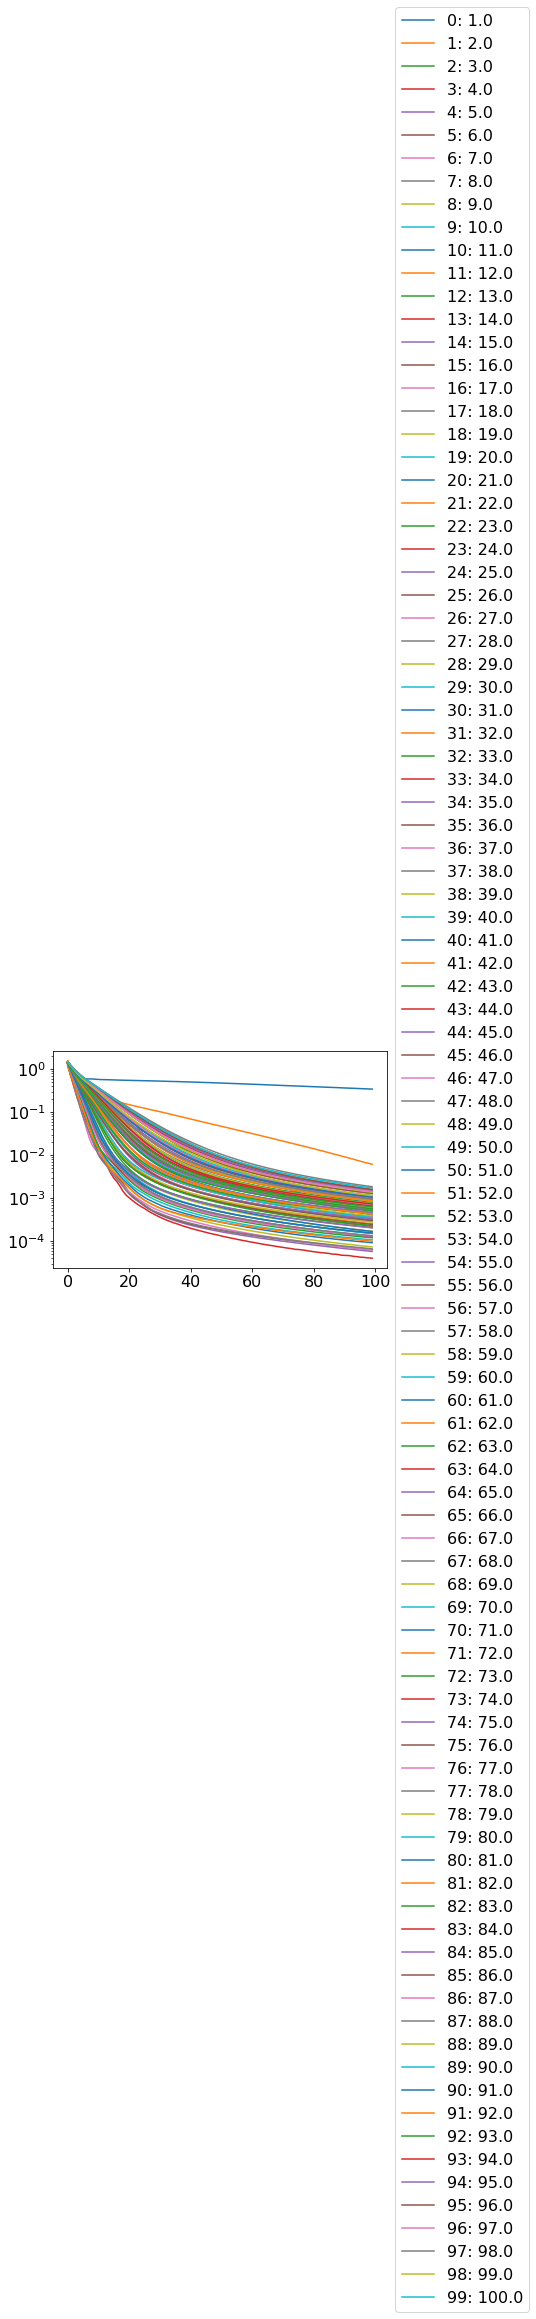

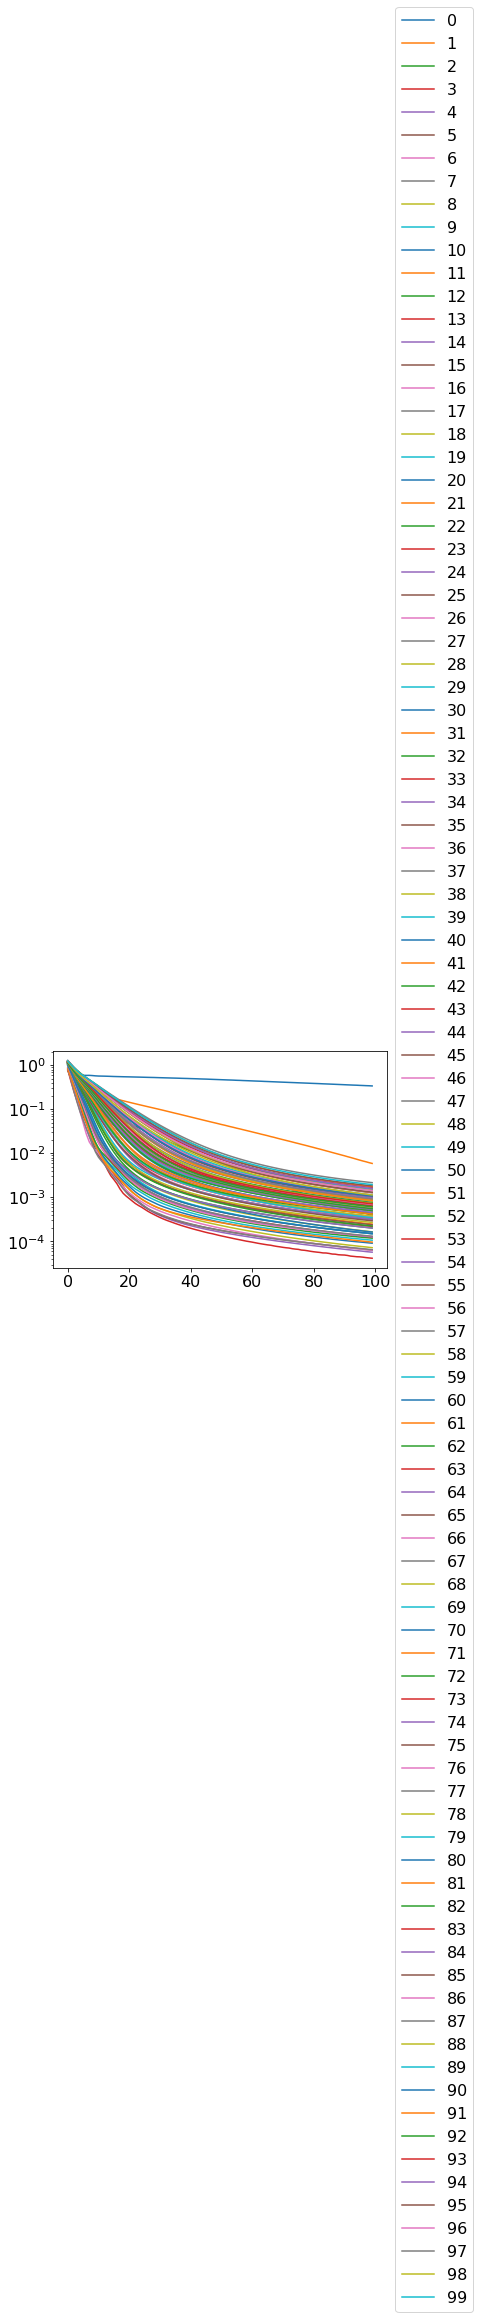

In [174]:
plt.figure()
for i in range(len(gaussian_scales)):
    plt.plot(history_list[i].history['loss'], label=f'{i}: {gaussian_scales[i]}')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure()
for i in range(len(gaussian_scales)):
    plt.plot(history_list[i].history['val_loss'], label=f'{i}')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [172]:
# learning rate is very important